In [1]:
! pip install neuralprophet
from neuralprophet import NeuralProphet


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
completed=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride - Apr 22, 2024 - Apr 28, 2024 (1).csv")
completed2=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride Details - Apr 29, 2024 - May 5, 2024 (1).csv")
completed3=pd.read_excel("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride Details.xlsx")
incompleted=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride Details (Historical) - Apr 1, 2024 - Apr 14, 2024.csv")
incompleted2=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride Details (Historical) - Apr 15, 2024 - Apr 30, 2024.csv")
incompleted3=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride Details (Historical) - May 1, 2024 - May 20, 2024.csv")

WARNING - (py.warnings._showwarnmsg) - /var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_47354/2198419674.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  completed=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride - Apr 22, 2024 - Apr 28, 2024 (1).csv")

WARNING - (py.warnings._showwarnmsg) - /var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_47354/2198419674.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  completed2=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride Details - Apr 29, 2024 - May 5, 2024 (1).csv")

WARNING - (py.warnings._showwarnmsg) - /var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_47354/2198419674.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  inc

In [4]:
incompleted_final = pd.concat([incompleted,incompleted2, incompleted3], ignore_index=True)
completed_final=pd.concat([completed,completed2,completed3],ignore_index=True)

In [5]:
incompleted_final=incompleted_final[['user_id','pickup_lat_long','request_made_at']]
completed_final=completed_final[['user_id','pickup_lat_long','request_made_at']]

In [6]:
dataset=pd.concat([completed_final,incompleted_final],ignore_index=True)

dataset['date_column'] = pd.to_datetime(dataset['request_made_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
dataset['date_column'] = dataset['date_column'].fillna(pd.to_datetime(dataset['request_made_at'], format='%m/%d/%Y %H:%M', errors='coerce'))

dataset['date_column'] = pd.to_datetime(dataset['date_column'])

dataset['10min_window'] = dataset['date_column'].dt.floor('10min')

deduped_data = dataset.sort_values(['user_id', 'date_column']).drop_duplicates(['user_id', '10min_window'], keep='first')

dropped_rows = len(dataset) - len(deduped_data)

print(f"Number of rows dropped: {dropped_rows}")
print(deduped_data)
dataset=deduped_data

Number of rows dropped: 124991
         user_id      pickup_lat_long      request_made_at  \
222501  13117245  22.587597,88.498335  2024-04-09 15:49:01   
388868  13117245   22.57818,88.482403      4/20/2024 18:28   
388864  13117245  22.577507,88.482128      4/23/2024 10:07   
388867  13117245  22.573576,88.508162      4/23/2024 14:23   
22735   13117245  22.559161,88.513259  2024-04-23 15:53:55   
...          ...                  ...                  ...   
95770   15726066  22.643145,88.438739  2024-05-20 23:32:20   
95765   15726075  22.642925,88.438831  2024-05-20 23:36:38   
95762   15726090  22.643021,88.438809  2024-05-20 23:42:28   
95759   15726102  22.643135,88.438738  2024-05-20 23:47:34   
95752   15726130  22.643190,88.438795  2024-05-20 23:57:04   

               date_column        10min_window  
222501 2024-04-09 15:49:01 2024-04-09 15:40:00  
388868 2024-04-20 18:28:00 2024-04-20 18:20:00  
388864 2024-04-23 10:07:00 2024-04-23 10:00:00  
388867 2024-04-23 14:23:00 2

In [7]:
from datetime import datetime, timedelta

dataset['date'] = dataset['date_column'].dt.date
dataset['hour'] = dataset['date_column'].dt.hour
hourly_demand = dataset.groupby(['date', 'hour']).size().reset_index(name='y')
hourly_demand['ds'] = hourly_demand.apply(lambda row: datetime.combine(row['date'], datetime.min.time()) + timedelta(hours=row['hour']), axis=1)
hourly_demand = hourly_demand.drop(columns=['date', 'hour'])
hourly_demand['ds'] = pd.to_datetime(hourly_demand['ds'])
hourly_demand_copy=hourly_demand

In [8]:
m = NeuralProphet()
m.set_plotting_backend("plotly-static")  
metrics = m.fit(hourly_demand)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 110
WARNING - (py.warnings._showwarnmsg) - /Users/aayushjain/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(

WARNING - (NP.config.set_lr_finder_a

Epoch 110: 100%|██████████| 110/110 [00:00<00:00, 1254.77it/s, loss=0.0325, v_num=5, MAE=102.0, RMSE=153.0, Loss=0.0304, RegLoss=0.000]  


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 254.06it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H



Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 345.01it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


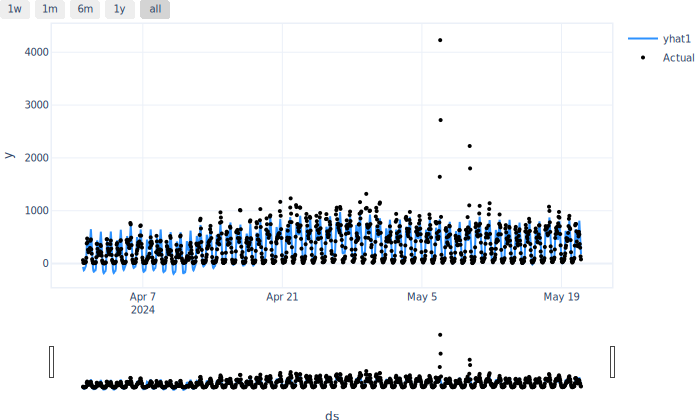

In [9]:
predicted = m.predict(hourly_demand_copy)
forecast = m.predict(hourly_demand_copy)
m.plot(forecast)


In [1]:
forecast

NameError: name 'forecast' is not defined

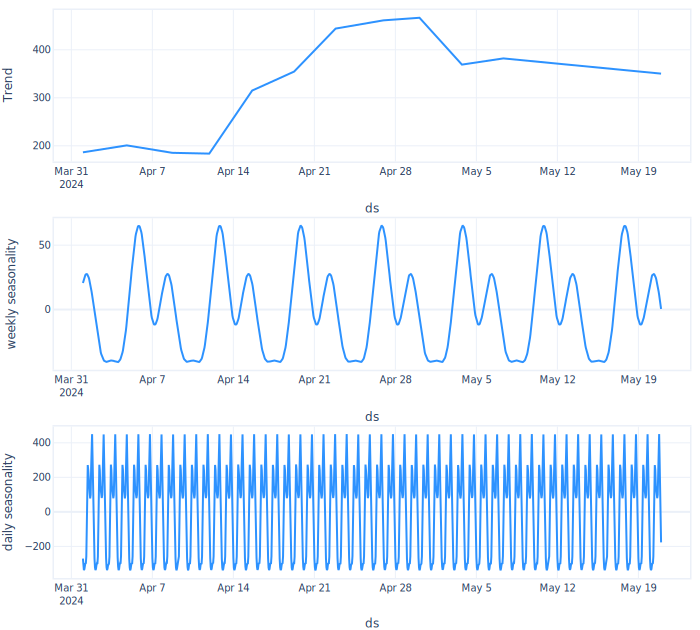

In [10]:
m.plot_components(forecast)


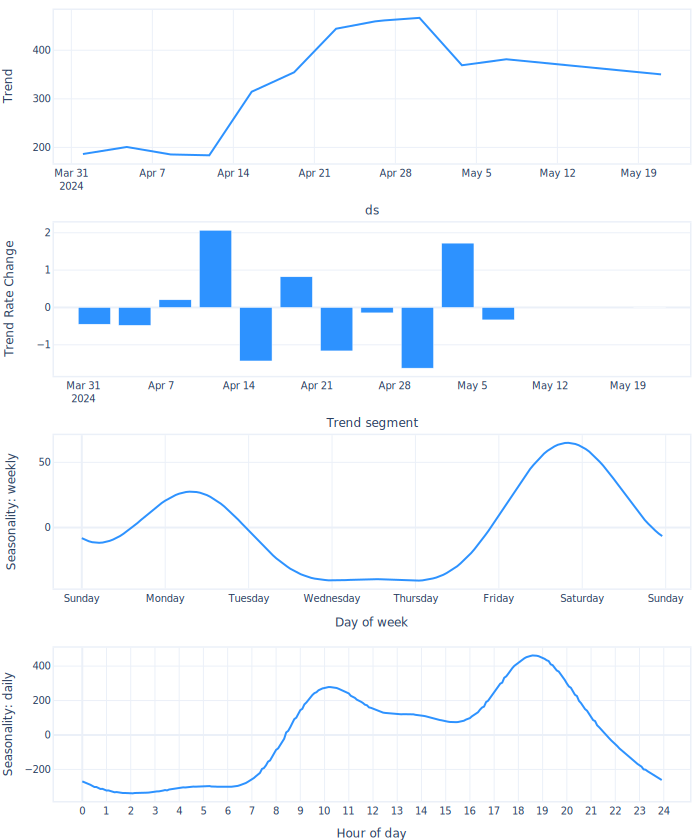

In [11]:
m.plot_parameters()


 day_of_week      y
0      Friday  9.4k
1      Monday  9.08k
2    Saturday  8.85k
3      Sunday  8k
4    Thursday  7.71k
5     Tuesday  7.71k
6   Wednesday  6.85k

In [12]:
m = NeuralProphet(n_lags=10, quantiles=[0.05, 0.95])
m.set_plotting_backend("plotly-static")
metrics = m.fit(hourly_demand_copy)
forecast = m.predict(hourly_demand_copy)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 110
WARNING - (py.warnings._showwarnmsg) - /Users/aayushjain/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning:

MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.


WARNING - (NP.config.set_lr_finder_args) - Learning 

Epoch 110: 100%|██████████| 110/110 [00:00<00:00, 921.30it/s, loss=0.0205, v_num=6, MAE=67.70, RMSE=107.0, Loss=0.0239, RegLoss=0.000]   

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H



Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 144.33it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


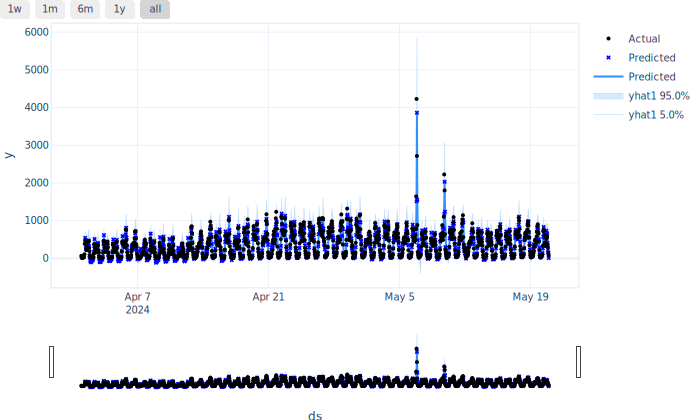

In [13]:
m.highlight_nth_step_ahead_of_each_forecast(1).plot(forecast)


In [16]:
hourly_demand

,y,ds
0,64,2024-04-01 00:00:00
1,17,2024-04-01 01:00:00
2,9,2024-04-01 02:00:00
3,21,2024-04-01 03:00:00
4,23,2024-04-01 04:00:00
...,...,...
1195,552,2024-05-20 19:00:00
1196,370,2024-05-20 20:00:00
1197,300,2024-05-20 21:00:00
1198,135,2024-05-20 22:00:00


In [18]:
import pandas as pd

hourly_demand_copy['ds'] = pd.to_datetime(hourly_demand_copy['ds'])

hourly_demand_copy['day_of_week'] = hourly_demand_copy['ds'].dt.day_name()


print(hourly_demand_copy)

        y                  ds day_of_week
0      64 2024-04-01 00:00:00      Monday
1      17 2024-04-01 01:00:00      Monday
2       9 2024-04-01 02:00:00      Monday
3      21 2024-04-01 03:00:00      Monday
4      23 2024-04-01 04:00:00      Monday
...   ...                 ...         ...
1195  552 2024-05-20 19:00:00      Monday
1196  370 2024-05-20 20:00:00      Monday
1197  300 2024-05-20 21:00:00      Monday
1198  135 2024-05-20 22:00:00      Monday
1199   79 2024-05-20 23:00:00      Monday

[1200 rows x 3 columns]


In [21]:
average_requests_per_day = hourly_demand_copy.groupby('day_of_week')['y'].mean().reset_index()

print(average_requests_per_day)

  day_of_week           y
0      Friday  394.315476
1      Monday  379.140625
2    Saturday  371.523810
3      Sunday  339.011905
4    Thursday  325.386905
5     Tuesday  322.327381
6   Wednesday  288.791667


In [22]:
total_requests_per_day = hourly_demand_copy.groupby('day_of_week')['y'].sum().reset_index()

print(total_requests_per_day)

  day_of_week      y
0      Friday  66245
1      Monday  72795
2    Saturday  62416
3      Sunday  56954
4    Thursday  54665
5     Tuesday  54151
6   Wednesday  48517


 day_of_week      y
0      Friday  9.4k
1      Monday  9.08k
2    Saturday  8.85k
3      Sunday  8k
4    Thursday  7.71k
5     Tuesday  7.71k
6   Wednesday  6.85k

In [25]:
total_days_in_dataset=hourly_demand_copy['day_of_week'].value_counts()/24

In [2]:
dev=[9.4,9.08,8.85,8,7.71,7.71,6.85]


In [4]:
divided_list = [x / 8 for x in dev]


In [5]:
divided_list

[1.175, 1.135, 1.10625, 1.0, 0.96375, 0.96375, 0.85625]

In [27]:
total_days_in_dataset

day_of_week
Monday       8.0
Tuesday      7.0
Wednesday    7.0
Thursday     7.0
Friday       7.0
Saturday     7.0
Sunday       7.0
Name: count, dtype: float64

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415743 entries, 222501 to 95752
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   user_id          415743 non-null  int64         
 1   pickup_lat_long  415743 non-null  object        
 2   request_made_at  415743 non-null  object        
 3   date_column      415743 non-null  datetime64[ns]
 4   10min_window     415743 non-null  datetime64[ns]
 5   date             415743 non-null  object        
 6   hour             415743 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 23.8+ MB


In [2]:
from neuralprophet import NeuralProphet
! pip install -upgrade plotly


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u


In [3]:
from neuralprophet import NeuralProphet


In [6]:
import pandas as pd

In [7]:
hourly_demand=pd.read_excel("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/hourly_demand_prophet.xlsx")

In [9]:
hourly_demand=hourly_demand[['ds','y']]

In [10]:
m = NeuralProphet()
m.set_plotting_backend("plotly-static")  
metrics = m.fit(hourly_demand)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 130
WARNING - (py.warnings._showwarnmsg) - /Users/aayushjain/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(

WARNING - (NP.config.set_lr_finder_a

Epoch 130: 100%|██████████| 130/130 [00:00<00:00, 2701.97it/s, loss=0.0245, v_num=0, MAE=86.30, RMSE=123.0, Loss=0.0247, RegLoss=0.000]  


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 138.92it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 253.62it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


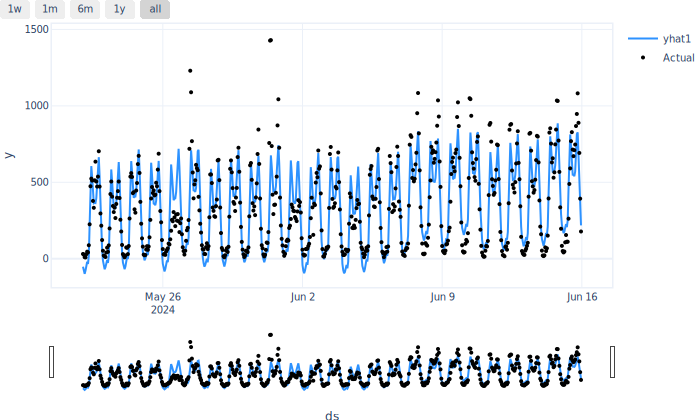

In [12]:
predicted = m.predict(hourly_demand)
forecast = m.predict(hourly_demand)
m.plot(forecast)

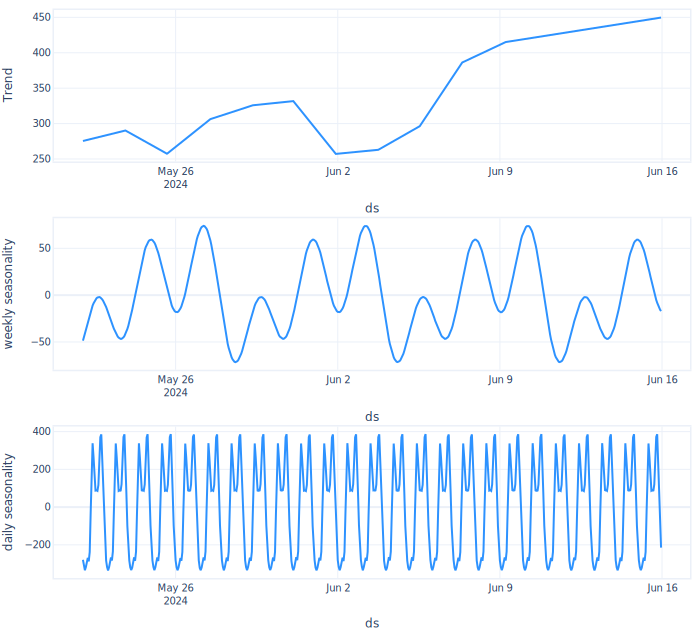

In [13]:
m.plot_components(forecast)


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.846% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.846% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.data.processing._handle_missing_data) - Dropped 48 rows at the end with NaNs in 'y' column.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 50.44it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


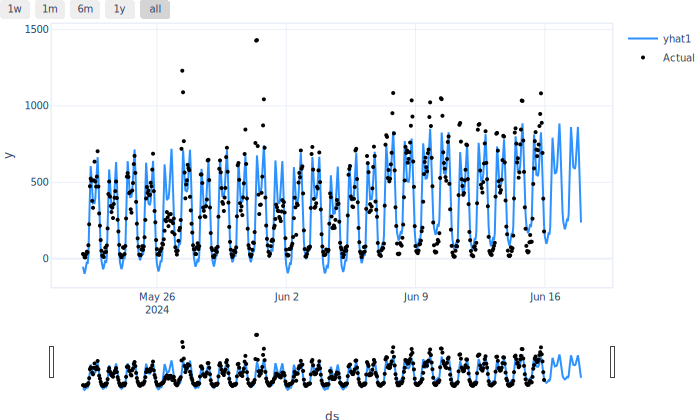

In [15]:
df_future = m.make_future_dataframe(hourly_demand, n_historic_predictions=True, periods=48)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

In [16]:
forecast.tail(24)

,ds,y,yhat1,trend,season_weekly,season_daily
624,2024-06-17 00:00:00,None,240.621277,455.074524,66.462830,-280.916077
625,2024-06-17 01:00:00,None,202.374939,455.289307,68.952255,-321.866638
626,2024-06-17 02:00:00,None,192.144058,455.504028,71.143456,-334.503418
627,2024-06-17 03:00:00,None,209.191818,455.718750,72.701530,-319.228485
628,2024-06-17 04:00:00,None,248.512344,455.933533,73.683174,-281.104370
629,2024-06-17 05:00:00,None,262.159882,456.148254,73.997696,-267.986084
630,2024-06-17 06:00:00,None,245.888763,456.363007,73.647377,-284.121613
631,2024-06-17 07:00:00,None,293.190643,456.577728,72.749138,-236.136230
632,2024-06-17 08:00:00,None,496.856598,456.792450,71.093262,-31.029083
633,2024-06-17 09:00:00,None,748.371460,457.007233,68.842957,222.521301
